# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

--2021-01-22 16:40:06--  https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.192.133, 151.101.64.133, 151.101.0.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.192.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 997750 (974K) [image/jpeg]
Saving to: '100zloty.jpg.1'

     0K .......... .......... .......... .......... ..........  5% 1,60M 1s
    50K .......... .......... .......... .......... .......... 10% 3,04M 0s
   100K .......... .......... .......... .......... .......... 15% 2,67M 0s
   150K .......... .......... .......... .......... .......... 20% 3,42M 0s
   200K .......... .......... .......... .......... .......... 25% 3,88M 0s
   250K .......... .......... .......... .......... .......... 30% 4,64M 0s
   300K .......... .......... .......... .......... .......... 35% 5,15M 0s
   350K .......... ..........

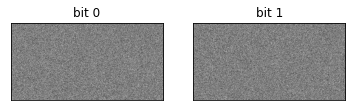

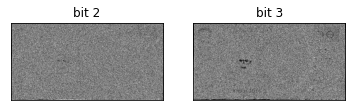

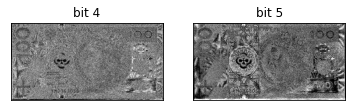

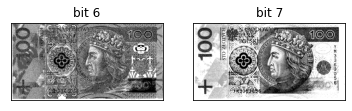

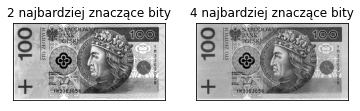

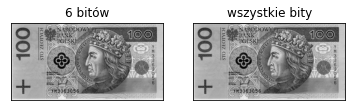

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

!wget https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg
im_100 = cv2.imread("100zloty.jpg", cv2.IMREAD_GRAYSCALE)
bps = []
for i in range(8):
    bps.append((im_100 >> i) & 1)

for i in range(4):
    f,(p1,p2) = plt.subplots(1,2)
    p1.imshow(((2 ** (i*2)) * bps[i*2]), cmap="gray")
    p2.imshow(((2 ** (1*2+1)) * bps[i*2+1]), cmap="gray")
    p1.set_title("bit "+str(i*2))
    p2.set_title("bit "+str(i*2+1))
    p1.set_xticks([])
    p1.set_yticks([])
    p2.set_xticks([])
    p2.set_yticks([])
    plt.show()

img_7_6=((2 ** 7) * bps[7]) + ((2 ** 6) * bps[6])
img_7_4=img_7_6+((2 ** 5) * bps[5]) + ((2 ** 4) * bps[4])
img_7_2=img_7_4+((2 ** 3) * bps[3]) + ((2 ** 2) * bps[2])
img_7_0=img_7_2+((2 ** 1) * bps[1]) + ((2 ** 0) * bps[0])

f,(p1,p2) = plt.subplots(1,2)
p1.imshow(img_7_6, cmap="gray")
p2.imshow(img_7_4, cmap="gray")
p1.set_title("2 najbardziej znaczące bity")
p2.set_title("4 najbardziej znaczące bity")
p1.set_xticks([])
p1.set_yticks([])
p2.set_xticks([])
p2.set_yticks([])
plt.show()

f1,(p1,p2) = plt.subplots(1,2)
p1.imshow(img_7_2, cmap="gray")
p2.imshow(img_7_0, cmap="gray")
p1.set_title("6 bitów")
p2.set_title("wszystkie bity")
p1.set_xticks([])
p1.set_yticks([])
p2.set_xticks([])
p2.set_yticks([])
plt.show()